In [8]:
# import torch
# print(f'PyTorch version: {torch.__version__}')
# print('*'*10)
# print(f'_CUDA version: ')
# !nvcc --version
# print('*'*10)
# print(f'CUDNN version: {torch.backends.cudnn.version()}')
# print(f'Available GPU devices: {torch.cuda.device_count()}')
# print(f'Device Name: {torch.cuda.get_device_name()}')

Displaying results for 6 images out of 6 total images.

image 1/1 /Users/brendan/Workspace/Personal/Conestoga/AI/foundations/final-project/data/traffic-light/ca/images/4.jpg: 320x640 3 reds, 2 greens, 73.3ms
Speed: 10.2ms preprocess, 73.3ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)

image 1/1 /Users/brendan/Workspace/Personal/Conestoga/AI/foundations/final-project/data/traffic-light/ca/images/5.jpg: 320x640 1 red, 1 green, 59.1ms
Speed: 2.6ms preprocess, 59.1ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 640)

image 1/1 /Users/brendan/Workspace/Personal/Conestoga/AI/foundations/final-project/data/traffic-light/ca/images/6.jpg: 320x640 2 reds, 2 greens, 54.0ms
Speed: 1.7ms preprocess, 54.0ms inference, 0.3ms postprocess per image at shape (1, 3, 320, 640)

image 1/1 /Users/brendan/Workspace/Personal/Conestoga/AI/foundations/final-project/data/traffic-light/ca/images/2.jpg: 320x640 2 reds, 75.5ms
Speed: 1.4ms preprocess, 75.5ms inference, 0.3ms post

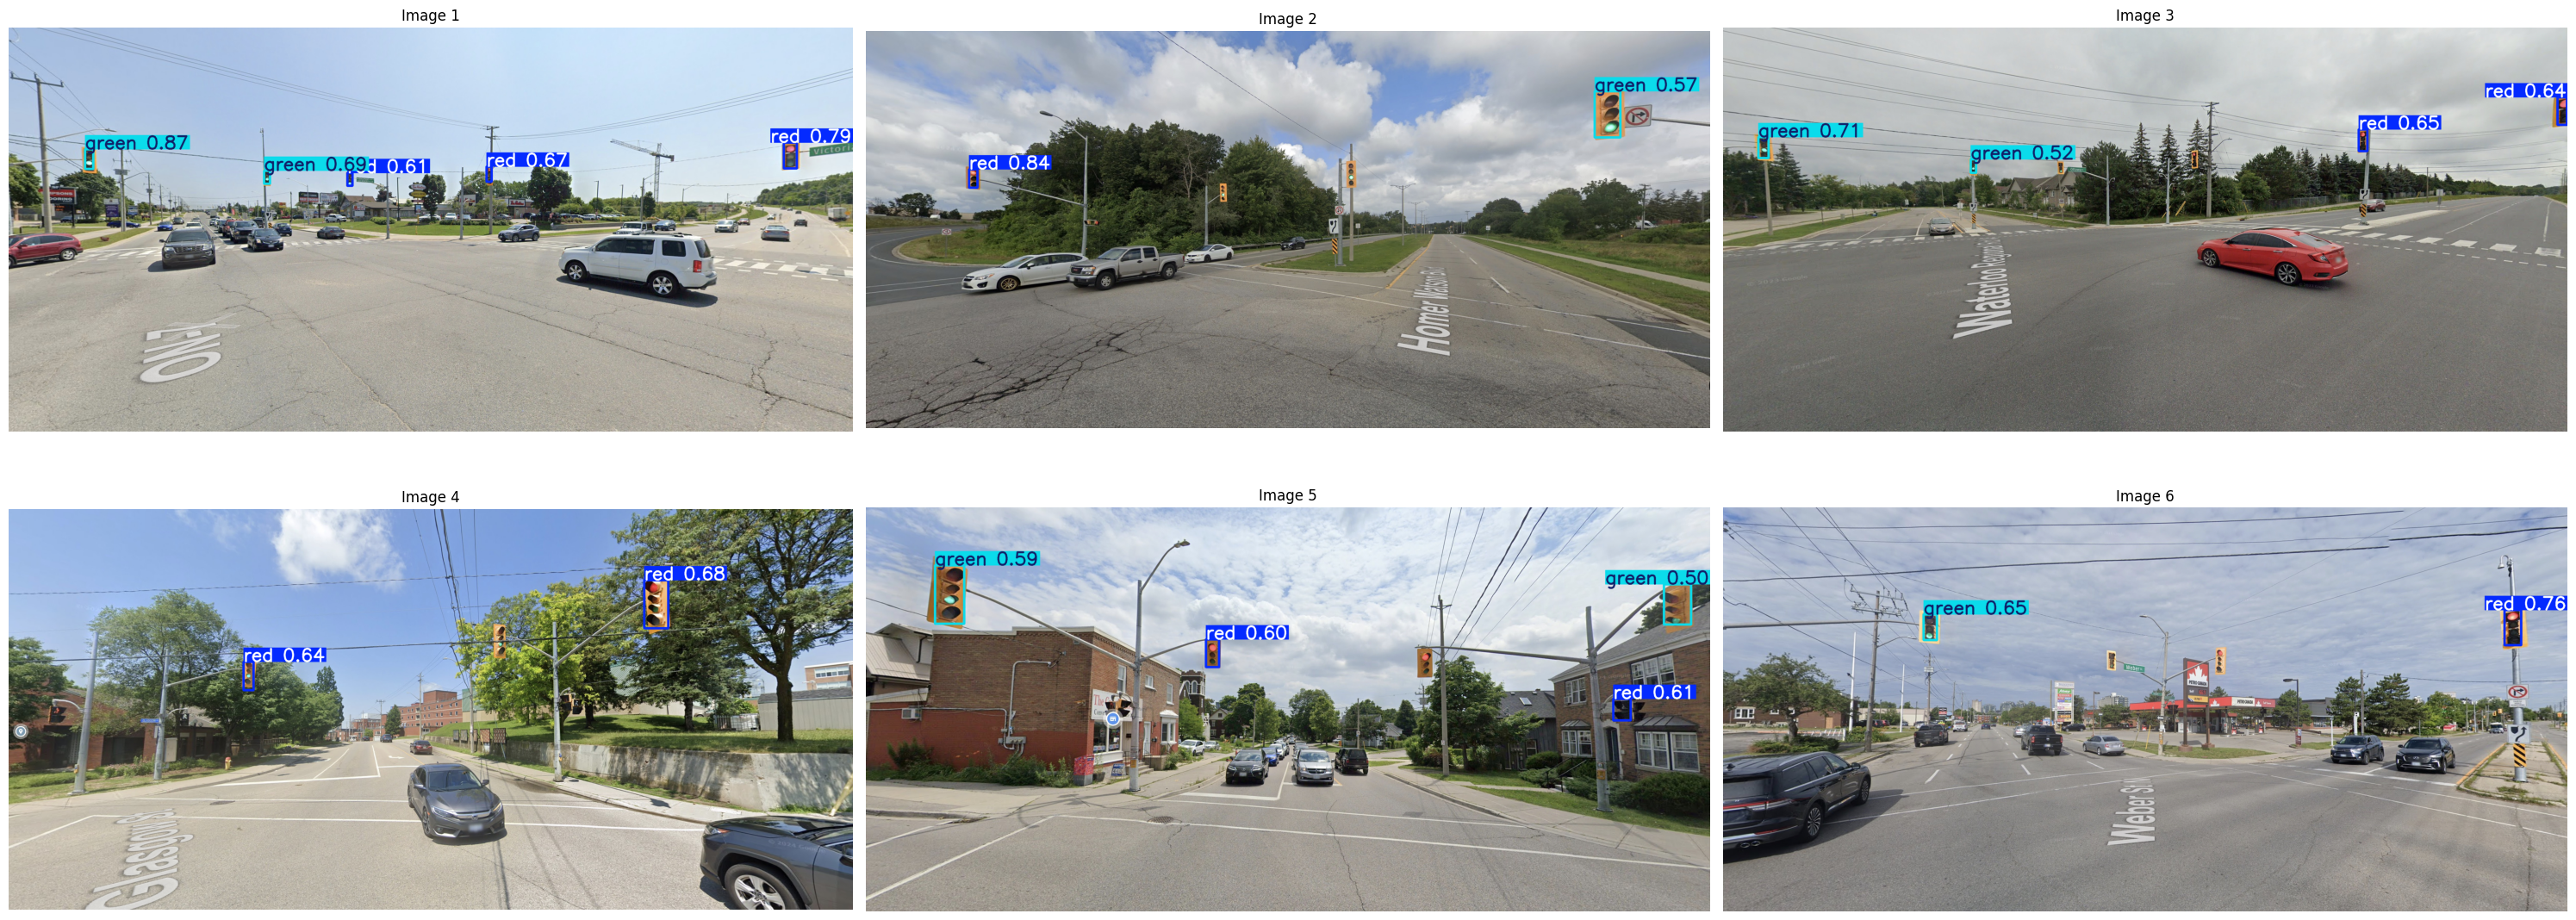

In [10]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import cv2


def evaluate_yolov8_in_memory(model_path, images_path, conf=0.5, max_images=5):

    model = YOLO(model_path)

    image_files = [f for f in os.listdir(images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    display_files = image_files[:max_images]
    print(f"Displaying results for {len(display_files)} images out of {len(image_files)} total images.")
    
    num_images = len(display_files)
    cols = 3
    rows = (num_images + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(30, 6 * rows))
    

    for i, image_file in enumerate(display_files):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]
        image_path = os.path.join(images_path, image_file)

        result = model.predict(source=image_path, conf=conf)[0]
        img_with_boxes = result.plot()

        # Convert from BGR to RGB
        img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

        ax.imshow(img_rgb)
        ax.axis('off')
        ax.set_title(f"Image {i+1}")

    for j in range(len(display_files), rows * cols):
        fig.delaxes(axes[j // cols, j % cols] if rows > 1 else axes[j % cols])

    plt.tight_layout()
    plt.show()


model_path = "./models/traffic_light.pt"
test_images_path = "./data/traffic-light/ca/images"

evaluate_yolov8_in_memory(model_path=model_path, images_path=test_images_path, conf=0.5, max_images=10)